In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdNow = pd.read_csv('CDNOW.txt',sep = '\s+',header = None, names=['user','date','quantity','price'])
cdNow.head()

,user,date,quantity,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
cdNow.date = pd.to_datetime(cdNow.date, format='%Y%m%d')
cdNow['month'] = cdNow.date.values.astype('datetime64[M]')
cdNow.set_index('date', drop=True, inplace = True)
cdNow.head()

,user,quantity,price,month
date,,,,
1997-01-01,1,1,11.77,1997-01-01
1997-01-12,2,1,12.00,1997-01-01
1997-01-12,2,5,77.00,1997-01-01
1997-01-02,3,2,20.76,1997-01-01
1997-03-30,3,2,20.76,1997-03-01


In [4]:
cdNow.info()
# 数据比较完整，没有空数据

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69659 entries, 1997-01-01 to 1997-03-26
Data columns (total 4 columns):
user        69659 non-null int64
quantity    69659 non-null int64
price       69659 non-null float64
month       69659 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.7 MB


In [5]:
cdNow.describe()

,user,quantity,price
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


## 商品销售静态分析
### 各订单购买数量分析

In [6]:
cdNow.quantity.agg(['max','min','std','mean'])

max     99.000000
min      1.000000
std      2.333924
mean     2.410040
Name: quantity, dtype: float64

### 各订单购买金额分析

In [7]:
cdNow.price.agg(['max','min','std','mean'])

max     1286.010000
min        0.000000
std       36.281942
mean      35.893648
Name: price, dtype: float64

## 商品销售动态分析
### 订单数量和金额趋势分析

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


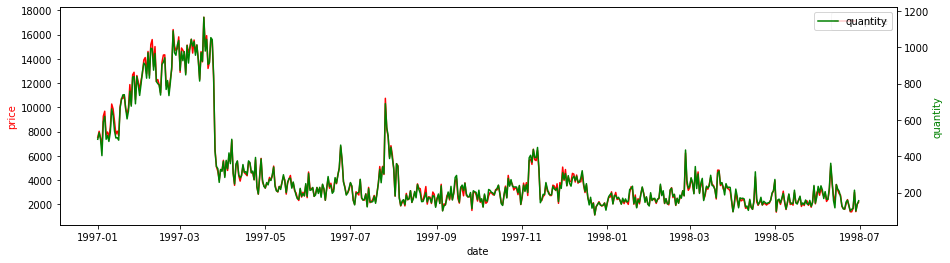

In [8]:
# 每天订单数量趋势
# 每一天所有订单价格的总和趋势
fig, ax1 = plt.subplots(figsize=(15,4))
ax1.plot(cdNow.price.resample('D').sum(),'r-', label = 'price')
ax1.set_xlabel('date', color='black')
ax1.set_ylabel('price', color='r')
ax1.legend()


ax2 = ax1.twinx()
ax2.plot(cdNow.quantity.resample('D').sum(), 'g-', label='quantity')
ax2.set_ylabel('quantity', color='g')
ax2.legend()

plt.show()

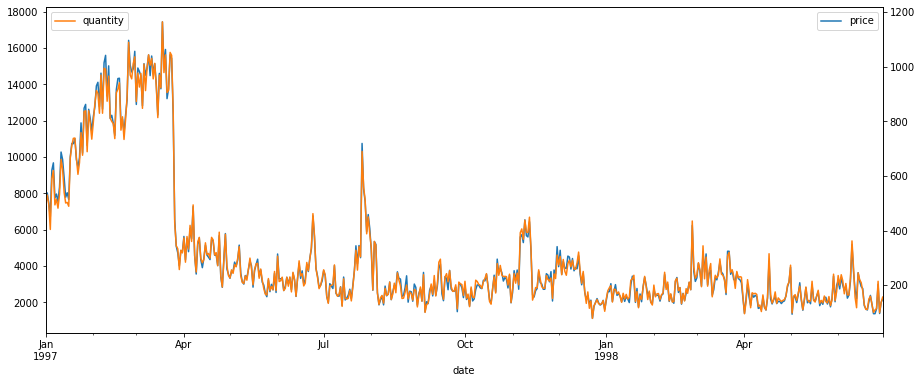

In [9]:
# 和上边一样,
fig = plt.figure(figsize=(15,6))
ax1 = cdNow.price.resample('D').sum().plot(y='price')
ax1.legend(loc=1)
ax2 = cdNow.quantity.resample('D').sum().plot(y='quantity', secondary_y=True)
ax2.legend(loc=2)
plt.show()

每一天的订单数量和价格是呈现规律性的，没有异常点出现

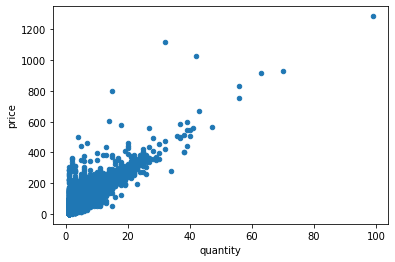

In [10]:
# 订单和消费金额散点图
cdNow.plot.scatter(x='quantity',y='price')
plt.show()

订单数量和金额呈现规律性

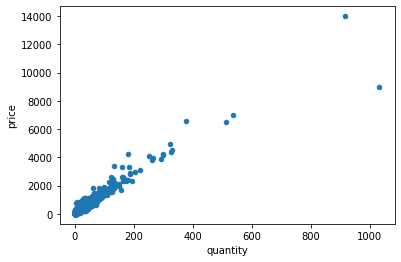

In [11]:
cdNow.groupby('user').sum().plot.scatter(x='quantity',y='price')
plt.show()
# 绘制用户散点图

每个用户的订单数量和消费金额同样呈现规律性。

也可以看出大部分用户订单数量在200以内

### 异常值检测

In [12]:
# NaN 数值检测
cdNow.isna().any()

user        False
quantity    False
price       False
month       False
dtype: bool

In [13]:
unitPrice = cdNow.price/cdNow.quantity

In [14]:
unitPrice.describe()

count    69659.000000
mean        15.459447
std          8.735528
min          0.000000
25%         12.270000
50%         13.990000
75%         15.490000
max        305.990000
dtype: float64

In [15]:
cdNow[unitPrice==0.0].head()

,user,quantity,price,month
date,,,,
1997-01-02,455,1,0.0,1997-01-01
1997-01-03,713,1,0.0,1997-01-01
1997-01-04,908,1,0.0,1997-01-01
1997-01-04,925,1,0.0,1997-01-01
1997-01-05,1101,1,0.0,1997-01-01


## 用户销售行为静态分析
### 各用户购买数量分析

In [16]:
# 各用户累积购买数量分析
cdNow.groupby('user').sum().describe()

,quantity,price
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


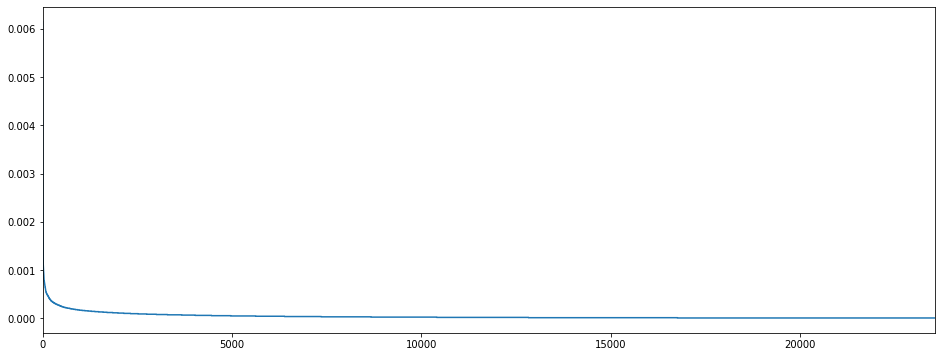

In [17]:
# 各用户 购买数量累计贡献分析
plt.figure(figsize=(16,6))
(cdNow.groupby('user').sum().quantity/cdNow.quantity.sum()).sort_values(ascending=False).plot(use_index=False)
plt.show()

user
8830     99
23474    70
22279    63
8529     56
7592     47
Name: quantity, dtype: int64


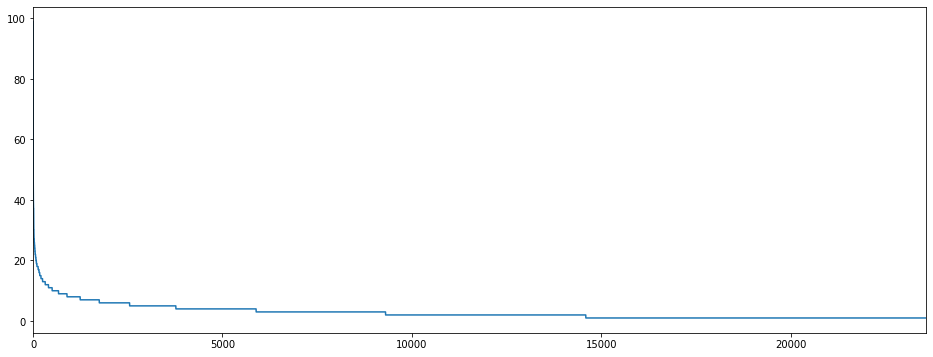

In [18]:
# 各用户 最大单笔贡献分析
plt.figure(figsize=(16,6))
print(cdNow.groupby('user').max().quantity.sort_values(ascending=False).head())
cdNow.groupby('user').max().quantity.sort_values(ascending=False).plot(use_index=False)
plt.show()

### 各用户购买金额分析

In [19]:
# 各用户累积购买金额分析
totalPurchase = cdNow.groupby('user').sum().price.sort_values(ascending=False)
print(totalPurchase.describe())
bins = pd.cut(totalPurchase,list(np.arange(-1,14000,500)))
totalPurchase.groupby(bins).count()

count    23570.000000
mean       106.080426
std        240.925195
min          0.000000
25%         19.970000
50%         43.395000
75%        106.475000
max      13990.930000
Name: price, dtype: float64


price
(-1, 499]         22834
(499, 999]          535
(999, 1499]         114
(1499, 1999]         44
(1999, 2499]         17
(2499, 2999]          7
(2999, 3499]          4
(3499, 3999]          3
(3999, 4499]          6
(4499, 4999]          1
(4999, 5499]          0
(5499, 5999]          0
(5999, 6499]          1
(6499, 6999]          2
(6999, 7499]          0
(7499, 7999]          0
(7999, 8499]          0
(8499, 8999]          1
(8999, 9499]          0
(9499, 9999]          0
(9999, 10499]         0
(10499, 10999]        0
(10999, 11499]        0
(11499, 11999]        0
(11999, 12499]        0
(12499, 12999]        0
(12999, 13499]        0
(13499, 13999]        1
Name: price, dtype: int64

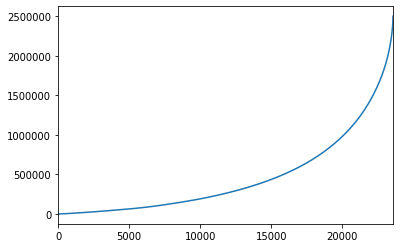

In [20]:
# 各用户累计购买金额贡献分析
user_amount = cdNow.groupby('user').price.sum().sort_values().reset_index()
user_amount['price']  = user_amount.price.cumsum()
user_amount.price.plot()
plt.show()

转换成百分比之后可以看出前 20000 个用户贡献了 40% 的消费, 后面4000位用户贡献了60%

In [21]:
# 各用户最大单笔消费金额分析
cdNow[['price','user']].groupby('user').max().describe()

,price
count,23570.000000
mean,43.897931
std,46.153873
min,0.000000
25%,15.360000
50%,29.980000
75%,54.677500
max,1286.010000


### 各用户购买次数分析

In [22]:
cdNow.groupby('user').count().quantity.describe()

count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: quantity, dtype: float64

## 用户消费行为动态分析

### 各用户第一次购买时间分析

In [23]:
cdNow.reset_index(drop=False, inplace=True)

In [24]:
cdNow.groupby('user').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

所用用户都是在1-3月份第一次购买的

### 各用户最后一次购买时间分析

In [25]:
cdNow.groupby('user').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

### 各用户最后一次消费与当前时间间隔

In [26]:
(pd.to_datetime('today') - cdNow[['user','date']].groupby('user').min()).head()

,date
user,
1,8236 days 15:35:12.018442
2,8225 days 15:35:12.018442
3,8235 days 15:35:12.018442
4,8236 days 15:35:12.018442
5,8236 days 15:35:12.018442


### 各用户生命周期分析

In [27]:
%%time
cdNow[['user','month']].groupby('user').apply(lambda x: x.max()-x.min()).month.value_counts()

Wall time: 41.7 s


0 days      12755
485 days      899
365 days      724
424 days      605
31 days       581
516 days      498
457 days      457
59 days       428
396 days      402
334 days      394
454 days      377
273 days      362
393 days      335
426 days      317
28 days       313
181 days      285
120 days      276
212 days      260
455 days      240
303 days      215
304 days      201
275 days      199
245 days      190
150 days      189
61 days       188
337 days      183
90 days       182
89 days       176
92 days       174
151 days      165
242 days      162
122 days      151
306 days      149
214 days      149
184 days      145
153 days      132
243 days      112
Name: month, dtype: int64

In [28]:
%%time
def lifeCycle(x):
    return x.max() - x.min()

cdNow[['user','month']].groupby('user').apply(lifeCycle).month.value_counts()

Wall time: 42 s


In [29]:
%%time
# 用内置函数效率好像更高
df = cdNow[['user','month']].groupby('user').agg(['max','min'])
print((df.month['max'] - df.month['min']).value_counts())

0 days      12755
485 days      899
365 days      724
424 days      605
31 days       581
516 days      498
457 days      457
59 days       428
396 days      402
334 days      394
454 days      377
273 days      362
393 days      335
426 days      317
28 days       313
181 days      285
120 days      276
212 days      260
455 days      240
303 days      215
304 days      201
275 days      199
245 days      190
150 days      189
61 days       188
337 days      183
90 days       182
89 days       176
92 days       174
151 days      165
242 days      162
122 days      151
306 days      149
214 days      149
184 days      145
153 days      132
243 days      112
dtype: int64
Wall time: 260 ms


### 各用户首次回购周期

In [30]:
def rebuyPeriod(x):
    if len(x.date)>1:
        return x.date.iloc[1] - x.date.iloc[0]
    else:
        return None

In [31]:
%%time
cdNow[['user','date']].groupby('user').apply(rebuyPeriod).value_counts()

Wall time: 2.61 s


0 days      351
1 days      237
7 days      200
6 days      191
3 days      189
2 days      176
5 days      171
4 days      170
8 days      165
13 days     165
14 days     165
15 days     156
12 days     144
16 days     140
11 days     135
10 days     126
20 days     118
18 days     115
21 days     115
19 days     114
9 days      112
17 days     108
23 days      99
25 days      98
28 days      98
32 days      94
27 days      92
35 days      88
31 days      87
24 days      85
           ... 
467 days      2
514 days      2
520 days      2
503 days      2
437 days      2
483 days      2
486 days      1
487 days      1
508 days      1
525 days      1
505 days      1
493 days      1
466 days      1
509 days      1
495 days      1
506 days      1
524 days      1
517 days      1
488 days      1
492 days      1
491 days      1
499 days      1
502 days      1
515 days      1
533 days      1
528 days      1
496 days      1
446 days      1
522 days      1
490 days      1
Length: 517, dtype: int6

### 用户平均购买周期

In [32]:
def avgPeriod(x):
    if len(x)>1:
        return (x.iloc[-1] - x.iloc[0])/(len(x)-1)
    else:
        return None
    
cdNow[['user','date']].groupby('user').apply(avgPeriod).date.value_counts()

0 days 00:00:00            146
1 days 00:00:00             74
7 days 00:00:00             72
8 days 00:00:00             59
6 days 00:00:00             56
13 days 00:00:00            53
16 days 00:00:00            52
5 days 00:00:00             49
14 days 00:00:00            49
41 days 00:00:00            47
3 days 00:00:00             46
15 days 00:00:00            46
19 days 00:00:00            45
4 days 00:00:00             45
2 days 00:00:00             45
11 days 00:00:00            44
20 days 00:00:00            41
27 days 00:00:00            41
12 days 00:00:00            41
9 days 00:00:00             39
10 days 00:00:00            39
21 days 00:00:00            37
17 days 00:00:00            37
25 days 00:00:00            36
22 days 00:00:00            35
24 days 00:00:00            35
28 days 00:00:00            34
18 days 00:00:00            34
33 days 00:00:00            34
32 days 00:00:00            33
                          ... 
8 days 07:00:00              1
15 days 

### 各月复购率
购买次数大于1次的人/所有购买过的人=复购率

假若1月1日有1000名会员来店消费，针对这1000名会员，我们统计出30天内回头的有500名，60天内回头的有700名，90天内回头的有800名，则30天内复购率是50%，60天内复购率为70%，90天内复购率为80%。

In [33]:
# 用pivot table
pivoted_amount = cdNow.pivot_table(index='user',columns = 'month', values='quantity', aggfunc='count').fillna(0)
columns_month = cdNow.month.sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户。

In [34]:
pivoted_amount_transfer = pivoted_amount.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_amount_transfer.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


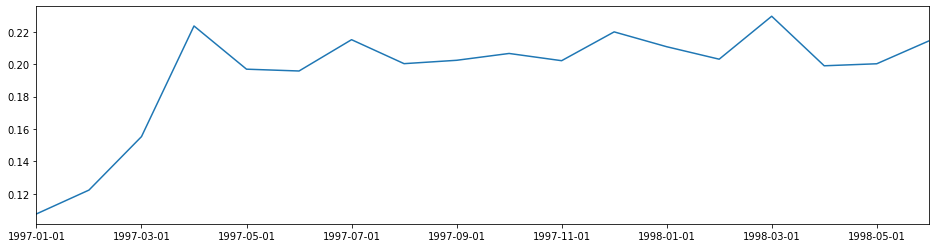

In [35]:
plt.figure(figsize=(16,4))
# 计算复购率
(pivoted_amount_transfer.sum(axis=0)/pivoted_amount_transfer.count(axis=0)).plot()
plt.show()

- 1月和2月份复购率比较低
- 后期稳定在20% 左右

### 各月回购率
回购率是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。我1月消费用户1000，他们中有300个2月依然消费，回购率是30%。

In [36]:
pivoted_amount = cdNow.pivot_table(index='user', columns='month', values='price',aggfunc='count')
pivoted_amount.columns = pivoted_amount.columns.strftime("%Y-%m-%d")
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [37]:
pivoted_purchase = pivoted_amount.applymap(lambda x: 1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [38]:
pivoted_purchase.tail()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
def purchase_return(data):
    status = pd.to_numeric(data,downcast='float')
    for i in range(len(data)-1):
        if data[i]==1:
            if data[i+1]==1:
                status[i]=1
            elif data[i+1]==0:
                status[i]=0
        else:
            status[i]= np.NaN
    status[len(data)-1]=np.NaN
    return status

In [40]:
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis=1)
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


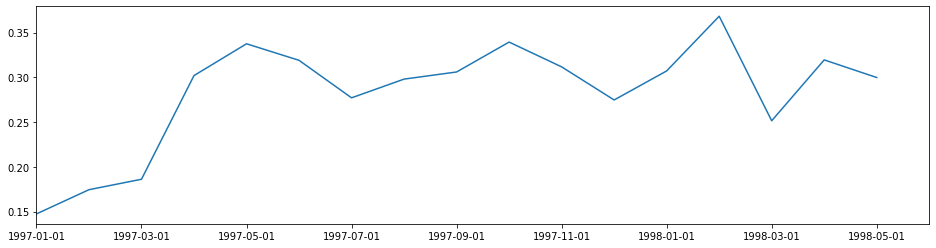

In [41]:
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(16,4))
plt.show()

### 各月留存率

### 用户分层(按月统计)

- 新用户的定义是第一次消费。
- 活跃用户即老客户，在某一个时间窗口内有过消费。
- 不活跃用户则是时间窗口内没有消费国的老客。
- 回流客户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。

In [42]:
def active_status(data):
    status = pd.Series(index=data.index, data=['']*len(data.index))
    for i in range(len(status)):
        # 如果本月没有消费
        if data.iloc[i] == 0:
            # 如果这不是首月
            # 如果上个月的状态是 未注册
            if i==0 or status.iloc[i-1] == 'unreg':
                status.iloc[i] = 'unreg'
            else:
                status.iloc[i] = 'unactive'
        # 如果本月有消费
        else:
            if i==0 or status.iloc[i-1]=='unreg':
                status.iloc[i] = 'new'
            elif status.iloc[i-1] == 'unactive':
                status.iloc[i] = 'return'
            else:
                status.iloc[i]='active'
    return status

pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_status(x), axis=1)
pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [43]:
# 计算每个月不同用户的数量
# 未注册用户属于未来潜在客户，在画图的时候要去除掉
purchase_status_counts = pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


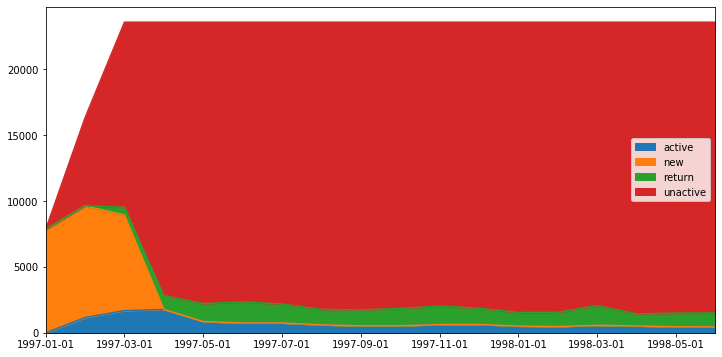

In [44]:
purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))
plt.show()

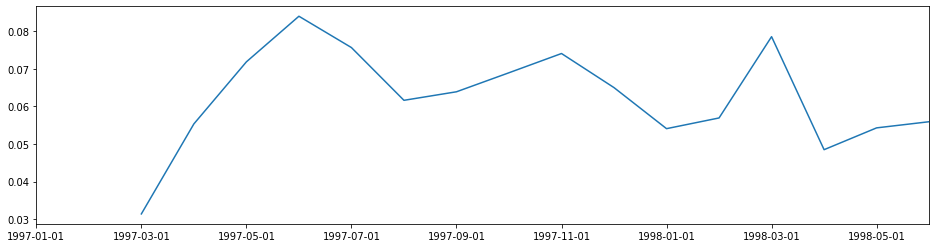

In [45]:
# 回流率
return_rate = purchase_status_counts.apply(lambda x: x/x.sum(), axis=1)
return_rate.loc['return'].plot(figsize=(16,4))
plt.show()

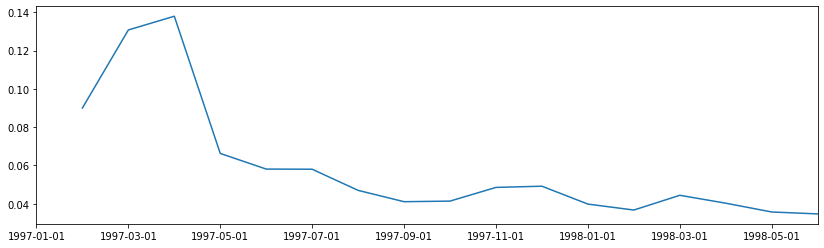

In [46]:
# 活跃用户
return_rate.loc['active'].plot(figsize=(14,4))
plt.show()

In [47]:
## 分析用户质量
user_amount

,user,price
0,10175,0.00
1,4559,0.00
2,1948,0.00
3,925,0.00
4,10798,0.00
5,19314,0.00
6,21690,0.00
7,10664,0.00
8,4384,0.00
9,6395,0.00
